In [145]:
from simpful import *
import seaborn as sns
import csv
import json
import globals
import matplotlib.pyplot as plt
import numpy as np
import util

In [2]:
fuzzy_variable_template = {
    'internal_name' : "internal_name_2",
    'nice_name' : "Nice Name", 
    'universe_of_discourse' : [0.0, 50.0],
    'fuzzy_type' : 'fuzzy',
    'function_types' : {
        'foo' : 'Endpoint',
        'bar' : 'Trapezoidal',
        'nuar' : 'Trapezoidal'
    },
    'values' : {
        'foo' : [0, 0.0, 5.0, 10.0],
        'bar' : [4.0, 12.0, 20.0, 25.0],
        'nuar' : [19.0, 25.0, 50.0, 50.0]
    }
}

crisp_variable_template = {
    'internal_name' : "crispy",
    'nice_name' : "Nice Lol", 
    'universe_of_discourse' : [0, 2],
    'fuzzy_type' : 'crisp',
    'function_types' : {
        'boo' : 'Endpoint',
        'far' : 'Trapezoidal',
    },
    'values' : {
        'bar' : [0, 1],
        'foo' : [1,2],
    }
}

In [3]:
def save_fuzzy_variables(fuzzy_variables,overwrite=False):
    dumped_dict = {}
    
    if overwrite:
        for var in fuzzy_variables:
            dumped_dict[var.get('internal_name')] = var
    else:
        current_settings = load_fuzzy_variables()
        
        for var in fuzzy_variables:
            current_settings[var.get('internal_name')] = var
        dumped_dict = current_settings.copy()
    json_file = open(globals.FUZZY_VARIABLES_FILE, 'w')
    json_file.write(json.dumps(dumped_dict, indent=4))
    json_file.close()  

In [6]:
def load_fuzzy_variables():
    json_file = open(globals.FUZZY_VARIABLES_FILE, "r")
    fuzzy_variables = json.loads(json_file.read())
    json_file.close()
    return fuzzy_variables

In [143]:
def fuzzify_all_variables():
    fuzzy_sets = {}
    fuzzy_values = util.load_fuzzy_variables()
    for name, variable in fuzzy_values.items():
        fuzzy_sets[name] = fuzzify_linguistic_variable(variable)
    return fuzzy_sets


def fuzzify_linguistic_variable(fuzzy_variable):
    fz_set = []
    if fuzzy_variable.get('fuzzy_type') == 'fuzzy':
        for k, val in fuzzy_variable.get('values').items():
            fz_set.append(FuzzySet(function=Trapezoidal_MF(a=val[0], b=val[1], c=val[2], d=val[3]), term=k))
    else:
        for k, val in fuzzy_variable.get('values').items():
            fz_set.append(CrispSet(val[0], val[1], term=k))
    ling_val = LinguisticVariable(fz_set, concept=fuzzy_variable.get('nice_name'), universe_of_discourse=fuzzy_variable.get('universe_of_discourse'))
    return ling_val


def load_rules():
    clusters = {}
    rules = []
    cluster = ''
    with open(globals.RULES_FILE, 'r') as file:
        file_lines = file.readlines()
        file_lines[0].replace('\n', '')
        cluster = file_lines[0].replace('\n', '').split(':')[1]
        for line in file_lines[1:]:
            line = line.replace('\n', '')
            if 'Rule_Cluster' in line:
                clusters[cluster] = rules.copy()
                rules = []
                cluster = line.split(':')[1]
            elif line.split(' ')[0] == 'IF':
                rules.append(line)
        clusters[cluster] = rules.copy()
    return clusters


def is_undefined_result(fuzzy_system):
    result_list = [bool(i) for i in fuzzy_system.get_firing_strengths()]
    return True not in result_list

In [178]:
FS = FuzzySystem()

for k, v in fuzzify_all_variables().items():
    FS.add_linguistic_variable(k, v)

lv = AutoTriangle(n_sets=4, terms=['bad', 'acceptable', 'good', 'best'], universe_of_discourse=[0, 10], verbose=False)
FS.add_linguistic_variable("Supplying", lv)

FS.add_rules(load_rules().get('Contracting'))

result = []
# for delay in list(np.arange(0, 101, 5)):
#     for time in list(np.arange(0, 8.1, 0.25)):
#         FS_1.set_variable('delayed_deliveries', delay)
#         FS_1.set_variable("average_delay_delivery", time)
#         result.append((delay, time, FS_1.inference()))
FS.set_variable('delayed_deliveries', 5)
FS.set_variable('contract_type', 0)
FS.set_variable('financial_sustainability', 10)
FS.set_variable('contract_price', 500000)
FS.set_variable("average_delay_delivery", 0.5)
FS.set_variable('overall_quality', 9)
print(FS.inference())
print(is_undefined_result(FS))
print(FS.get_firing_strengths())



# FS_1.set_variable('delayed_deliveries', 25)
# FS_1.set_variable("average_delay_delivery", 8)
# print(FS_1.get_firing_strengths())
# #print(FS_1.Sugeno_inference(['Quality']))
# print(FS_1.inference())

  ____  __  _  _  ____  ____  _  _  __   
 / ___)(  )( \/ )(  _ \(  __)/ )( \(  ) v2.5.1 
 \___ \ )( / \/ \ ) __/ ) _) ) \/ (/ (_/\ 
 (____/(__)\_)(_/(__)  (__)  \____/\____/

 Created by Marco S. Nobile (m.s.nobile@tue.nl)
 and Simone Spolaor (simone.spolaor@unimib.it)

{'Supplying': 8.892225558892225, 'contract_risk': 1.5000000000000002, 'experience': 0}
False
[1.0, 0.0, 0.0, 0.375, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [155]:
print (load_rules().get('Contracting'))

['IF (((contract_price IS Very_expensive) OR (contract_price IS Expensive)) AND ((financial_sustainability IS Medium) OR (financial_sustainability IS Good))) THEN (contract_risk IS Risky)', 'IF (((contract_price IS Very_expensive) OR (contract_price IS Expensive)) AND ((financial_sustainability IS Bankruptcy) OR (financial_sustainability IS Low))) THEN (contract_risk IS Very_risky)', 'IF ((contract_price IS Medium) AND (contract_type IS One_time)) THEN (contract_risk IS Risky)', 'IF ((contract_price IS Very_expensive) OR (contract_price IS Expensive)) THEN (contract_risk IS Risky)', 'IF ((delayed_deliveries IS Never) AND (average_delay_delivery IS None)) THEN (Supplying IS best)', 'IF ((delayed_deliveries IS Rare) OR (average_delay_delivery IS Few)) THEN (Supplying IS best)', 'IF ((delayed_deliveries IS Rare) OR (average_delay_delivery IS None)) THEN (Supplying IS best)', 'IF ((delayed_deliveries IS Never) OR (average_delay_delivery IS Few)) THEN (Supplying IS best)', 'IF ((delayed_del

In [140]:
def is_undefined_result(fuzzy_system):
    result_list = [bool(i) for i in fuzzy_system.get_firing_strengths()]
    return (True not in result_list)

In [80]:
def get_cluster_four_set():
    return AutoTriangle(n_sets=4, terms=['bad', 'acceptable', 'good', 'best'], universe_of_discourse=[0, 10], verbose=False)

In [34]:
def load_rules():
    clusters = {}
    rules = []
    cluster = ''
    with open(globals.RULES_FILE, 'r') as file:
        file_lines = file.readlines()
        file_lines[0].replace('\n', '')
        cluster = file_lines[0].replace('\n', '').split(':')[1]
        for line in file_lines[1:]:
            line = line.replace('\n', '')
            if 'Rule_Cluster' in line:
                clusters[cluster] = rules.copy()
                rules = []
                cluster = line.split(':')[1]
            elif line.split(' ')[0] == 'IF':
                rules.append(line)
        clusters[cluster] = rules.copy()
    return clusters

In [14]:
def gen_init_fuzzy_values(values_names):
    result = {}
    for name in values_names:
        result[name] = [0.0, 0.0, 0.0, 0.0]
    return result

In [15]:
def gen_init_crisp_values(values_names):
    result = {}
    i = 1.0
    for name in values_names:
        result[name] = [i-1, i].copy()
        i += 1
    return result

In [16]:
def init_fuzzy_file():
    linguistic_variables = []

    with open(globals.LINGUISTIC_VALUES_FILE, newline='') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        for row in list(reader)[1:]:
            row = list(filter(lambda item: item, row))
            new_fuzzy_var = fuzzy_variable_template.copy()
            new_fuzzy_var['internal_name'] = row[0]
            new_fuzzy_var['nice_name'] = row[1]
            if row[2] == 'fuzzy':
                new_fuzzy_var['fuzzy_type'] = 'fuzzy'
                new_fuzzy_var['values'] = gen_init_fuzzy_values(row[3:])
                new_fuzzy_var['universe_of_discourse'] = [0.0, 1.0]
            elif row[2] == 'crisp':
                new_fuzzy_var['fuzzy_type'] = 'crisp'
                new_fuzzy_var['values'] = gen_init_crisp_values(row[3:])
                new_fuzzy_var['universe_of_discourse'] = [0.0, float(len(row[3:]))]
            linguistic_variables.append(new_fuzzy_var)
            
    save_fuzzy_variables(linguistic_variables,True)

In [127]:
def fuzzify_linguistic_variable(fuzzy_variable):
    fz_set = []
    if fuzzy_variable.get('fuzzy_type') == 'fuzzy':
        for k, val in fuzzy_variable.get('values').items():
            fz_set.append(FuzzySet(function=Trapezoidal_MF(a=val[0], b=val[1], c=val[2], d=val[3]), term=k))
    else:
        for k, val in fuzzy_variable.get('values').items():
            fz_set.append(CrispSet(val[0], val[1], term=k))
    ling_val = LinguisticVariable(fz_set, concept=fuzzy_variable.get('nice_name'), universe_of_discourse=fuzzy_variable.get('universe_of_discourse'))
    return (fuzzy_variable.get('internal_name'),ling_val)

In [123]:
def fuzzify_all_variables():
    fuzzy_sets = {}
    fuzzy_values = load_fuzzy_variables()
    for name, variable in fuzzy_values.items():
        fuzzy_sets[name] = fuzzify_linguistic_variable(variable)
    return fuzzy_sets

  ____  __  _  _  ____  ____  _  _  __   
 / ___)(  )( \/ )(  _ \(  __)/ )( \(  ) v2.5.1 
 \___ \ )( / \/ \ ) __/ ) _) ) \/ (/ (_/\ 
 (____/(__)\_)(_/(__)  (__)  \____/\____/

 Created by Marco S. Nobile (m.s.nobile@tue.nl)
 and Simone Spolaor (simone.spolaor@unimib.it)



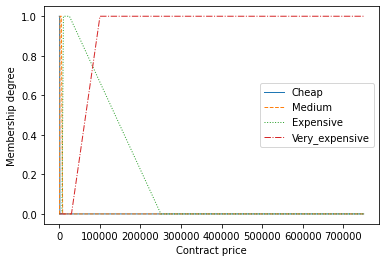

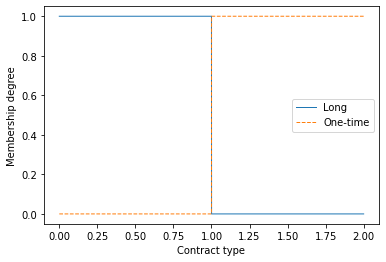

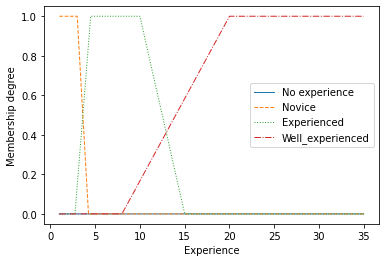

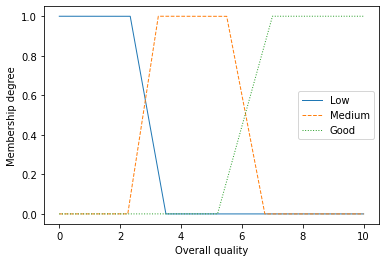

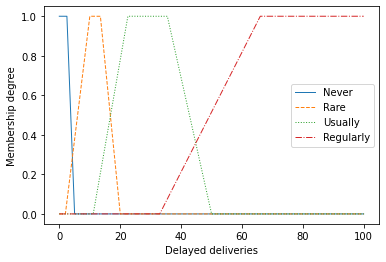

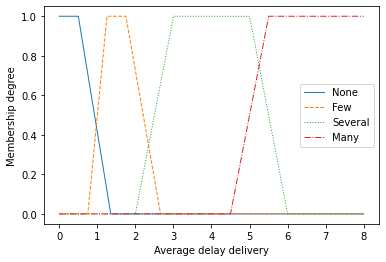

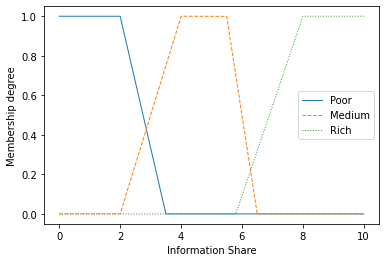

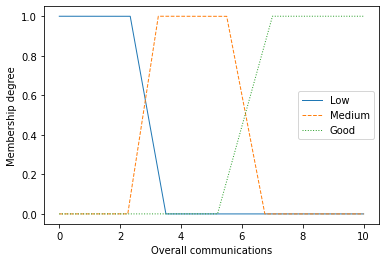

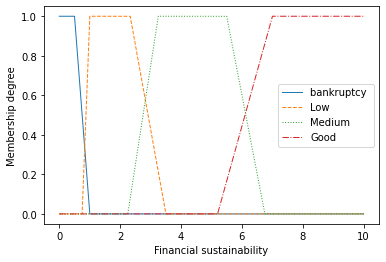

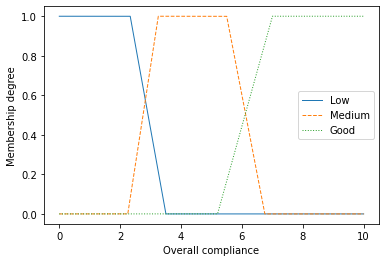

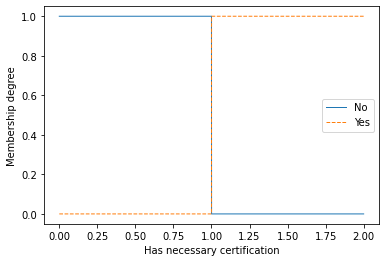

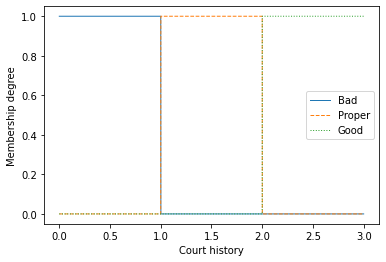

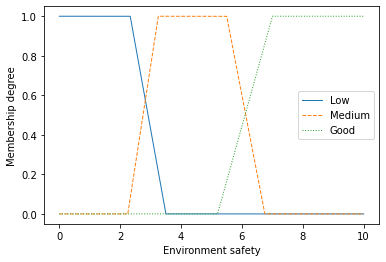

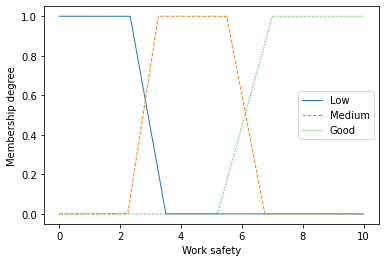

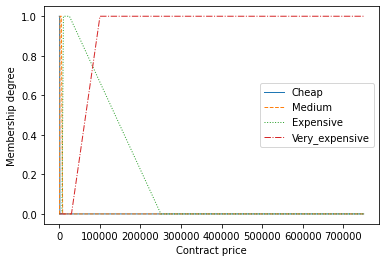

In [125]:
#print (fuzzify_all_variables())

FS = FuzzySystem()
a = fuzzify_all_variables()

for k, v in a.items():
    FS.add_linguistic_variable(k, v)
    
for k in a.keys ():
    FS.plot_variable(k)
#FS.add_linguistic_variable('contract_price', fuzzify_all_variables().get('contract_price'))

In [ ]:
fuzzy_sets = fuzzify_all_variables()

contracting_fs = FuzzySystem()
quality_fs = FuzzySystem()
supplying_fs = FuzzySystem()
communication_fs = FuzzySystem()
finance_and_assets_fs = FuzzySystem()
compliance_fs = FuzzySystem()
EHS_fs = FuzzySystem()

contracting_fs

supplying_fs.add_linguistic_variable('Supplying', AutoTriangle(n_sets=4, terms=['bad', 'acceptable', 'good', 'best'], 
                                                               universe_of_discourse=[0, 10], verbose=False))
